In [1]:
import pandas as analytics
import os
import matplotlib.pyplot as graph
import numpy as maths
from math import log
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('../data/')

In [3]:
filename = 'data1.csv'

# Manual Preprocessing

In [4]:
df_raw = analytics.read_csv(filename,header=None)
df_raw.head()

,0,1,2
0,6,32,1
1,26,39,1
2,2,38,1
3,25,39,1
4,3,35,1


In [5]:
# # df_raw = df_raw.drop(['sex','age'],axis =1)
# df_raw.to_csv('check.csv',header=None,index =False)
# df_raw = analytics.read_csv('check.csv',header=None)
# df_raw.head()

In [6]:
df_raw.columns

Index([0, 1, 2], dtype='int64')

In [7]:
cols = ['x'+str(i+1) for i in df_raw.columns[:-1]] + ['y']
df_raw.columns = cols
# df_raw['y'] = df_raw['y'].replace('g',0).replace('b',1)
# df_raw = df_raw.drop('x2',axis = 1)
# df_raw
df_raw.head()
# cols

,x1,x2,y
0,6,32,1
1,26,39,1
2,2,38,1
3,25,39,1
4,3,35,1


# Working Processing

In [8]:
training_perc = 0.7

In [9]:
training_number =  int(training_perc * len(df_raw))
df_raw = df_raw.sample(frac = 1)
df_train = df_raw[:training_number]
df_test = df_raw[training_number:]

In [10]:
maxima = {}
minima = {}
for col in df_raw.columns[:-1]:
    maxima.update({col:df_train[col].max()})
    minima.update({col:df_train[col].min()})    
    df_train[col] = (df_train[col] - minima[col])/(maxima[col] - minima[col])
df_train

,x1,x2,y
145,0.877551,0.755102,-1
153,0.653061,0.285714,-1
102,0.755102,0.530612,-1
62,0.183673,0.816327,1
163,0.857143,0.306122,-1
...,...,...,...
193,0.510204,0.020408,-1
56,0.163265,0.469388,1
93,0.142857,0.897959,1
168,0.734694,0.734694,-1


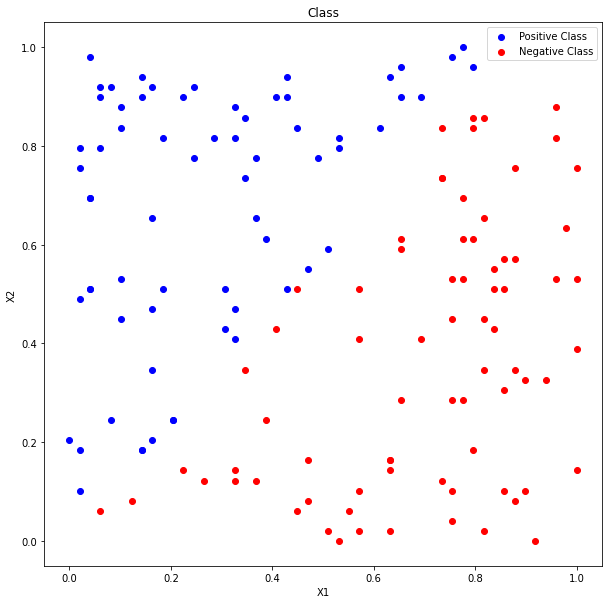

In [11]:
df_pos = df_train[df_train['y'] == 1]
df_neg = df_train[df_train['y'] == -1]
figure = graph.figure(figsize=(10,10))
graph.scatter(df_pos['x1'], df_pos['x2'], c = 'blue',label = 'Positive Class')
graph.scatter(df_neg['x1'], df_neg['x2'], c = 'red', label = 'Negative Class')
graph.title("Class")
graph.xlabel("X1")
graph.ylabel("X2")
graph.legend()
graph.show()

In [12]:
mu_pos = df_pos.iloc[:,:-1].mean()
mu_neg = df_neg.iloc[:,:-1].mean()

In [13]:
x_p = (df_pos - mu_pos).iloc[:,:-1]
x_n = (df_neg - mu_neg).iloc[:,:-1]

In [14]:
covariance_matrix_pos = (x_p.T @ x_p) / (len(x_p) - 1)
covariance_matrix_neg = (x_n.T @ x_n) / (len(x_n) - 1 ) 

In [15]:
covariance_matrix = ((len(x_p) - 1 )*covariance_matrix_pos + (len(x_n) - 1 )*covariance_matrix_neg)/((len(x_n) - 1 ) + (len(x_p) - 1 ))
covariance_matrix

,x1,x2
x1,0.047684,0.025146
x2,0.025146,0.067606


In [16]:
mu_pos = df_pos.iloc[:,:-1].mean()
mu_neg = df_neg.iloc[:,:-1].mean()

In [17]:
covariance_matrix_inv = maths.linalg.inv(covariance_matrix)
covariance_matrix_inv

array([[26.0884952 , -9.70354684],
       [-9.70354684, 18.40079643]])

In [23]:
w = covariance_matrix_inv @ maths.array(mu_pos - mu_neg)
w = maths.array(w).reshape(-1,1)

In [19]:
pi_pos = len(df_pos)/len(df_train)
pi_neg = len(df_neg)/len(df_train)

In [24]:
w0 = (- 0.5 * mu_pos @ covariance_matrix_inv @ mu_pos.T) + (0.5 * mu_neg @ covariance_matrix_inv @ mu_neg.T) + log(abs(pi_pos / pi_neg))

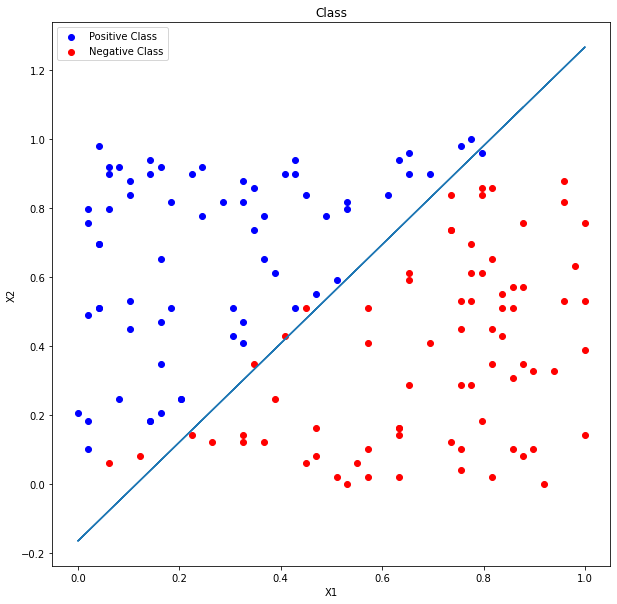

In [27]:
hyperplane = -((w[0] * df_train['x1'])  + w0)/w[1]

figure = graph.figure(figsize=(10,10))
graph.scatter(df_pos['x1'], df_pos['x2'], c = 'blue',label = 'Positive Class')
graph.scatter(df_neg['x1'], df_neg['x2'], c = 'red', label = 'Negative Class')
graph.title("Class")
graph.xlabel("X1")
graph.ylabel("X2")
graph.legend()
graph.plot(df_train['x1'],hyperplane)
graph.show()

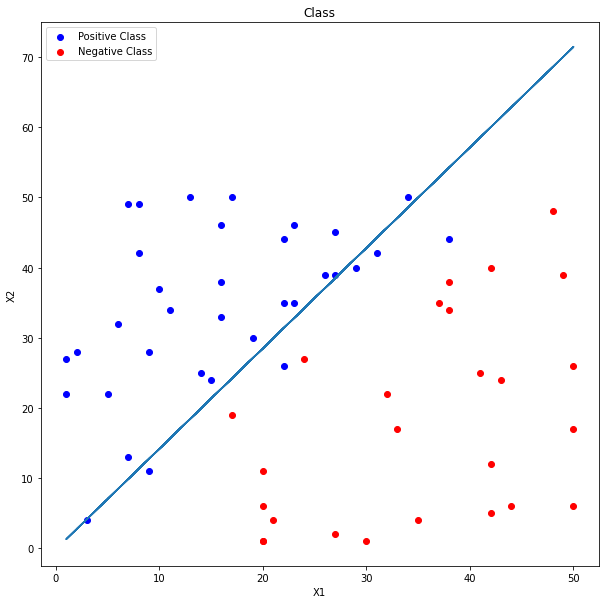

In [30]:
hyperplane = -((w[0] * df_test['x1'])  + w0)/w[1]

df_pos = df_test[df_test['y'] == 1]
df_neg = df_test[df_test['y'] == -1]

figure = graph.figure(figsize=(10,10))
graph.scatter(df_pos['x1'], df_pos['x2'], c = 'blue',label = 'Positive Class')
graph.scatter(df_neg['x1'], df_neg['x2'], c = 'red', label = 'Negative Class')
graph.title("Class")
graph.xlabel("X1")
graph.ylabel("X2")
graph.legend()
graph.plot(df_test['x1'],hyperplane)
graph.show()